<a href="https://colab.research.google.com/github/juanalistapablo/MAIT-Monitoria-IA/blob/main/hiperparametros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos Genéticos

In [ ]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean as distancia_euclidiana
from itertools import permutations

def desenhar_rota(rota):
  tamanho_rota = len(rota)
  distancia_percorrida = 0

  for i in range(tamanho_rota):
    x,y = rota[i]

    cor = "black"
    if i == 0:
      cor = "blue"
    elif i == tamanho_rota - 1:
      cor = "red"

    plt.scatter(x, y, color=cor)
    plt.annotate(f"({x}, {y})", (x, y))
    if i < tamanho_rota - 1:
      x1, y1 = rota[i+1]
      dx = x1 - x
      dy = y1 - y
      plt.arrow(x, y, dx, dy, color="black", head_width = 0.1)
      distancia_percorrida = distancia_percorrida + distancia_euclidiana(rota[i], rota[i+1])

  plt.title(f'Rota com distancia de {round(distancia_percorrida, 2)}')
  plt.show()

def calcular_distancia_rota(rota):
  """
  Esta função calcula a distância total de uma rota, somando as distâncias
  euclidianas entre pontos consecutivos da rota fornecida.

  Parameters:
  rota (list): Uma lista de pontos (tuplas) onde cada ponto representa uma posição no espaço.

  Returns:
  float: A distância total percorrida na rota.
  """

  distancia = 0  # Inicializa a variável que armazenará a distância total.
  tamanho_rota = len(rota)  # Armazena o número total de pontos na rota.

  # Itera sobre cada ponto na rota.
  for i in range(tamanho_rota):
      # Verifica se o ponto atual não é o último na rota.
      if i < tamanho_rota - 1:
          # Calcula e acumula a distância euclidiana entre o ponto atual e o próximo.
          distancia = distancia + distancia_euclidiana(rota[i], rota[i+1])

  return distancia  # Retorna a distância total calculada.

def forca_bruta(origem, destino, enderecos):
    # Inicializa a variável que vai armazenar a menor distância encontrada
    # com infinito, pois qualquer distância calculada será menor que infinito.
    menor_distancia = float('inf')

    # Inicializa a variável que vai armazenar a rota correspondente à menor distância
    # com None, pois ainda não encontramos nenhuma rota.
    menor_rota = None

    # Itera sobre todas as permutações possíveis dos endereços.
    # permutations(enderecos) retorna todas as possíveis ordenações dos endereços,
    # ou seja, todas as rotas possíveis (sem considerar origem e destino).
    for permutacao in permutations(enderecos):
        # Cria uma rota completa adicionando a origem no início da permutação
        # dos endereços e o destino no final.
        rota = [origem] + list(permutacao) + [destino]

        # Calcula a distância total da rota usando a função calcular_distancia_rota
        distancia_rota = calcular_distancia_rota(rota)

        # Verifica se a distância da rota calculada é menor que a menor distância encontrada até agora.
        # Se for, atualiza as variáveis menor_distancia e menor_rota.
        if distancia_rota < menor_distancia:
            menor_distancia = distancia_rota
            menor_rota = rota

    # Retorna a menor rota encontrada e sua respectiva distância.
    return menor_rota, menor_distancia

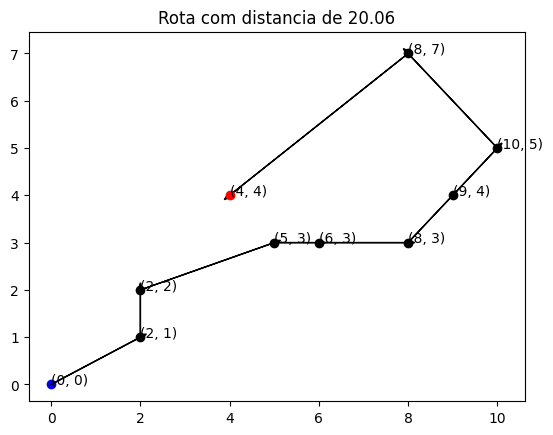

In [ ]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2, 1), (5, 3), (8, 3), (10, 5), (9, 4), (8, 7), (6, 3)]# 10! vezes reperesenta o numero permutações calculadas

menor_rota, menor_distancia = forca_bruta(origem, destino, enderecos)
desenhar_rota(menor_rota)

In [ ]:
def avaliar(individuo, origem, enderecos, destino):
  rota = [origem]
  for i in individuo:
     rota.append(enderecos[i])
  rota.append(destino)

  distancia_percorrida = calcular_distancia_rota(rota)

  return distancia_percorrida,

In [ ]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 4.0 MB/s eta 0:00:00


In [ ]:
from deap import base, creator, tools, algorithms
import numpy as np

In [ ]:
# Define o tamanho da população inicial
tam_populacao_inicial = 200
# Define a probabilidade de cruzamento
prob_cruzamento = 0.9
# Define a probabilidade de mutação
prob_mutacao = 0.2
# Define o número de gerações
numero_geracoes = 200

# Cria o tipo 'FitnessMin' que visa minimizar o valor da função objetivo (distância da rota)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
# Cria o tipo 'Individuo', que é uma lista com um atributo de fitness do tipo 'FitnessMin'
creator.create("Individuo", list, fitness=creator.FitnessMin)

# Inicializa uma caixa de ferramentas para armazenar as configurações do algoritmo
toolbox = base.Toolbox()
# Registra a função 'Genes', que gera uma permutação aleatória de índices dos endereços
toolbox.register("Genes", np.random.permutation, len(enderecos))
# Registra a função 'Individuos', que inicializa um indivíduo (rota) usando 'Genes'
toolbox.register("Individuos", tools.initIterate, creator.Individuo, toolbox.Genes)

# Registra a função 'Populacao', que cria uma população de indivíduos
toolbox.register("Populacao", tools.initRepeat, list, toolbox.Individuos)
# Cria a população inicial com 'tam_populacao_inicial' indivíduos
populacao = toolbox.Populacao(n=tam_populacao_inicial)

# Registra o operador de cruzamento do tipo 'cxPartialyMatched'
toolbox.register("mate", tools.cxPartialyMatched)
# Registra o operador de mutação do tipo 'mutShuffleIndexes' com probabilidade de mutação por bit 'indpb'
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=prob_mutacao)
# Registra o operador de seleção do tipo 'selTournament' com tamanho do torneio '3'
toolbox.register("select", tools.selTournament, tournsize=3)
# Registra a função de avaliação 'avaliar' com os argumentos de origem, endereços e destino
toolbox.register("evaluate", avaliar, origem=origem, enderecos=enderecos, destino=destino)

# Executa o algoritmo genético simples com os operadores e parâmetros definidos anteriormente
algoritmo = algorithms.eaSimple(populacao,
                                toolbox,
                                cxpb=prob_cruzamento,  # Probabilidade de cruzamento
                                mutpb=prob_cruzamento,  # Probabilidade de mutação
                                ngen=numero_geracoes,  # Número de gerações
                                verbose=False)  # Desativa a saída de log detalhada

# Seleciona o melhor indivíduo da população final
melhor_ind = tools.selBest(populacao, 1)[0]


/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
def algoritmo_genetico(origem, destino, enderecos, tam_populacao_inicial=100, prob_cruzamento=0.7, prob_mutacao=0.1, numero_geracoes=100):

  # Cria o tipo 'FitnessMin' que visa minimizar o valor da função objetivo (distância da rota)
  creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
  # Cria o tipo 'Individuo', que é uma lista com um atributo de fitness do tipo 'FitnessMin'
  creator.create("Individuo", list, fitness=creator.FitnessMin)

  # Inicializa uma caixa de ferramentas para armazenar as configurações do algoritmo
  toolbox = base.Toolbox()
  # Registra a função 'Genes', que gera uma permutação aleatória de índices dos endereços
  toolbox.register("Genes", np.random.permutation, len(enderecos))
  # Registra a função 'Individuos', que inicializa um indivíduo (rota) usando 'Genes'
  toolbox.register("Individuos", tools.initIterate, creator.Individuo, toolbox.Genes)

  # Registra a função 'Populacao', que cria uma população de indivíduos
  toolbox.register("Populacao", tools.initRepeat, list, toolbox.Individuos)
  # Cria a população inicial com 'tam_populacao_inicial' indivíduos
  populacao = toolbox.Populacao(n=tam_populacao_inicial)

  # Registra o operador de cruzamento do tipo 'cxPartialyMatched'
  toolbox.register("mate", tools.cxPartialyMatched)
  # Registra o operador de mutação do tipo 'mutShuffleIndexes' com probabilidade de mutação por bit 'indpb'
  toolbox.register("mutate", tools.mutShuffleIndexes, indpb=prob_mutacao)
  # Registra o operador de seleção do tipo 'selTournament' com tamanho do torneio '3'
  toolbox.register("select", tools.selTournament, tournsize=3)
  # Registra a função de avaliação 'avaliar' com os argumentos de origem, endereços e destino
  toolbox.register("evaluate", avaliar, origem=origem, enderecos=enderecos, destino=destino)

  # Executa o algoritmo genético simples com os operadores e parâmetros definidos anteriormente
  algoritmo = algorithms.eaSimple(populacao,
                                  toolbox,
                                  cxpb=prob_cruzamento,  # Probabilidade de cruzamento
                                  mutpb=prob_cruzamento,  # Probabilidade de mutação
                                  ngen=numero_geracoes,  # Número de gerações
                                  verbose=False)  # Desativa a saída de log detalhada

  # Seleciona o melhor indivíduo da população final
  melhor_ind = tools.selBest(populacao, 1)[0]


  # Inicializa a variável menor_rota com o ponto de origem
  menor_rota = [origem]

  # Itera sobre os índices contidos no melhor indivíduo encontrado
  # Cada índice em melhor_ind corresponde a um endereço na lista de endereços
  for i in melhor_ind:
      # Adiciona o endereço correspondente ao índice i na lista menor_rota
      menor_rota.append(enderecos[i])

  # Após iterar por todos os endereços, adiciona o ponto de destino à lista menor_rota
  menor_rota.append(destino)

  # Calcula distancia percorrida
  distancia_percorrida = calcular_distancia_rota(menor_rota)

  return menor_rota, distancia_percorrida

In [ ]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2, 1), (5, 3), (8, 3), (10, 5), (9, 4), (8, 7), (6, 3)]

/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


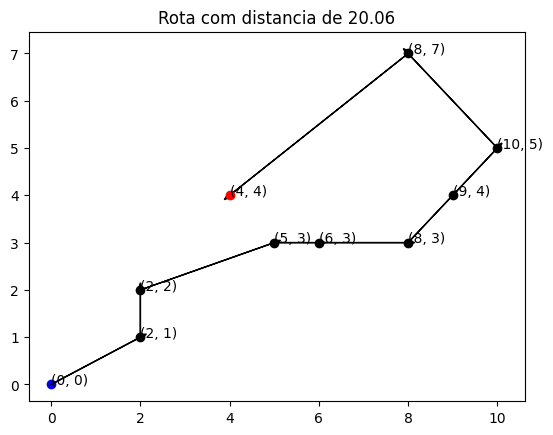

In [ ]:
menor_rota, distancia_percorrida = algoritmo_genetico(origem, destino, enderecos, numero_geracoes=100)
desenhar_rota(menor_rota)

# EDA

In [ ]:
from sklearn import datasets
iris = datasets.load_iris(return_X_y= True)#apenas as entradas!
x = iris[0] #primeiro elemento da tupla
y = iris [1]
# Load the iris dataset with the Bunch object structure
iris_data = datasets.load_iris()
# Access features_names from the Bunch object
features = iris_data['feature_names']  #or iris_data.feature_names
print(features)
#If you also need the data (x) and target(y) you can get them:
x = iris_data.data
y = iris_data.target
datasets.load_iris()['target_names']#'setosa'= 0, 'versicolor' = 1, 'virginica'= 2
x

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

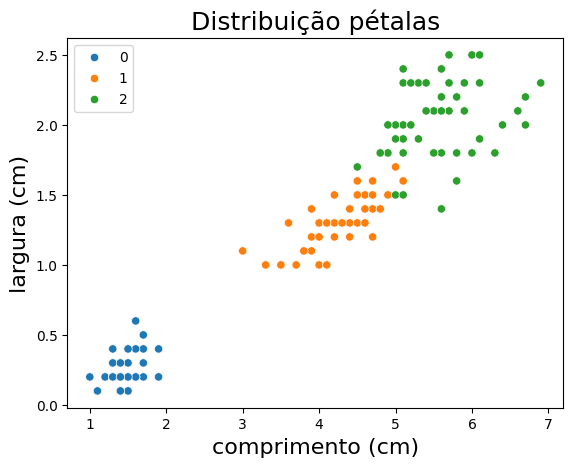

In [ ]:
import matplotlib.pyplot as plt#visulizar distribuiçao dos Dados.
import seaborn as sns#pontos, melhor para identificar formas futuras  de criar retas de separaçao

sns.scatterplot(x = x[:,2], y = x[:,3], hue = y, palette = "tab10")
plt.xlabel('comprimento (cm)', fontsize = 16)#comprimento das petalas
plt.ylabel('largura (cm)', fontsize = 16)#largura das petalas
plt.title('Distribuição pétalas', fontsize = 18)
plt.show()
#consentraçao da cetosa na origem.(petalas menores)e etc..

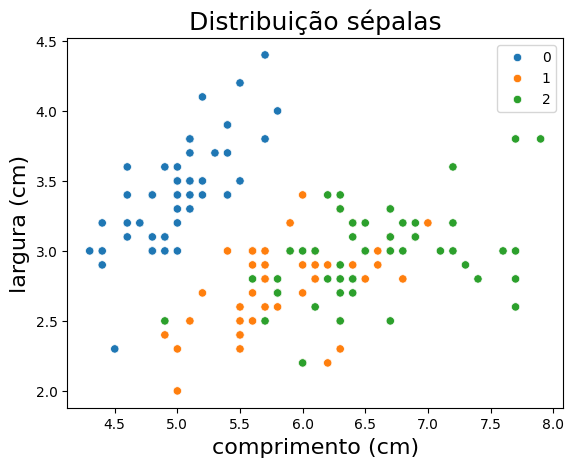

In [ ]:
#distribuisao de sepalas.
sns.scatterplot(x = x[:,0], y = x[:,1], hue = y, palette = "tab10")#sepalas n consentradas na origem.
plt.xlabel('comprimento (cm)', fontsize = 16)# 1 e 2 mais misturados.
plt.ylabel('largura (cm)', fontsize = 16)
plt.title('Distribuição sépalas', fontsize = 18)
plt.show()

# Definindo Melhores Hiperparámetros

In [ ]:
import random  # Importing random module

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Realizando a divisão do dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando os dados (padronização)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertendo as saídas para a forma de one-hot encoding (para classificação multiclass)
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

# Função para construir o MLP
def build_mlp(num_layers, num_neurons, activation, learning_rate):
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=X_train.shape[1], activation=activation))  # Ajuste no input_dim
    for _ in range(num_layers - 1):
        model.add(Dense(num_neurons, activation=activation))
    model.add(Dense(3, activation='softmax'))  # Para 3 classes no Iris dataset
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Função de fitness
def fitness(individual):
    num_layers = individual[0]
    num_neurons = individual[1]
    learning_rate = individual[2]
    activation = individual[3]
    epochs = individual[4]

    model = build_mlp(num_layers, num_neurons, activation, learning_rate)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    accuracy = model.evaluate(X_test, y_test, verbose=0)
    return accuracy[1]  # Retorna a precisão

# Inicialização da população
def initialize_population(pop_size, param_ranges):
    population = []
    for _ in range(pop_size):
        individual = [random.choice(r) for r in param_ranges]
        population.append(individual)
    return population

def crossover(parent1, parent2):
    # Realiza crossover em dois pais para gerar um filho
    crossover_point = random.randint(1, len(parent1) - 1)
    child = parent1[:crossover_point] + parent2[crossover_point:]
    return child

def mutation(child, param_ranges):
    mutation_point = random.randint(0, len(child) - 1)
    possible_mutations = param_ranges[mutation_point]
    child[mutation_point] = random.choice(possible_mutations)
    return child

def select_parents(population, fitness_values):
    # Seleciona os melhores indivíduos para reprodução
    selected = []
    sorted_population = [x for _, x in sorted(zip(fitness_values, population), reverse=True)]
    selected = sorted_population[:len(population)//2]
    return selected

# Algoritmo genético
def genetic_algorithm():
    pop_size = 10  # Tamanho da população
    generations = 50  # Número de gerações
    mutation_rate = 0.1  # Taxa de mutação
    param_ranges = [
        [3, 4, 5],  # Número de camadas
        [64, 128, 256],  # Número de neurônios
        [0.0001, 0.001, 0.01],  # Taxa de aprendizado
        ['relu', 'tanh'],  # Função de ativação
        [10, 50, 100]  # Número de épocas
    ]

    population = initialize_population(pop_size, param_ranges)

    for generation in range(generations):
        # Avaliar a aptidão de cada indivíduo
        fitness_values = [fitness(ind) for ind in population]

        # Selecionar os melhores indivíduos para reprodução
        selected = select_parents(population, fitness_values)

        # Gerar nova geração através de crossover e mutação
        next_population = []
        for _ in range(pop_size):
            parent1, parent2 = random.sample(selected, 2)
            child = crossover(parent1, parent2)
            if random.random() < mutation_rate:
                child = mutation(child, param_ranges)  # Passando param_ranges para mutation
            next_population.append(child)

        population = next_population

    # Melhor solução
    best_individual = max(population, key=fitness)
    return best_individual

best_hyperparameters = genetic_algorithm()
print("Melhores hiperparâmetros encontrados:", best_hyperparameters)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Melhores hiperparâmetros encontrados: [3, 256, 0.01, 'relu', 100]


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - categorical_accuracy: 0.3763 - loss: 1.0544 - val_categorical_accuracy: 0.6389 - val_loss: 0.7714
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.7184 - loss: 0.7276 - val_categorical_accuracy: 0.6667 - val_loss: 0.6035
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.7422 - loss: 0.5365 - val_categorical_accuracy: 0.7500 - val_loss: 0.5115
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.8110 - loss: 0.4728 - val_categorical_accuracy: 0.6667 - val_loss: 0.4704
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.7165 - loss: 0.4284 - val_categorical_accuracy: 0.9722 - val_loss: 0.4177
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.8305 - loss: 0.4009 - val_categorical_accuracy: 0.6667 - val_loss: 0.4307
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.7719 - loss: 0.3841 - val_categoric

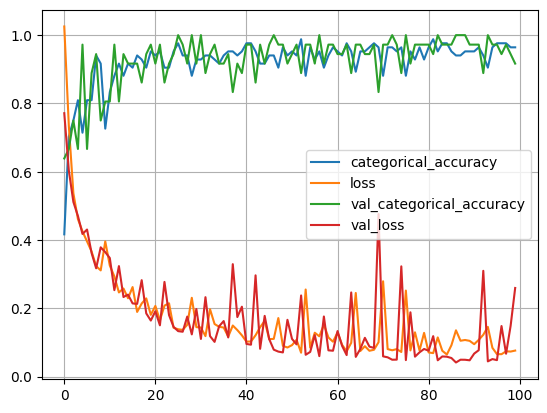

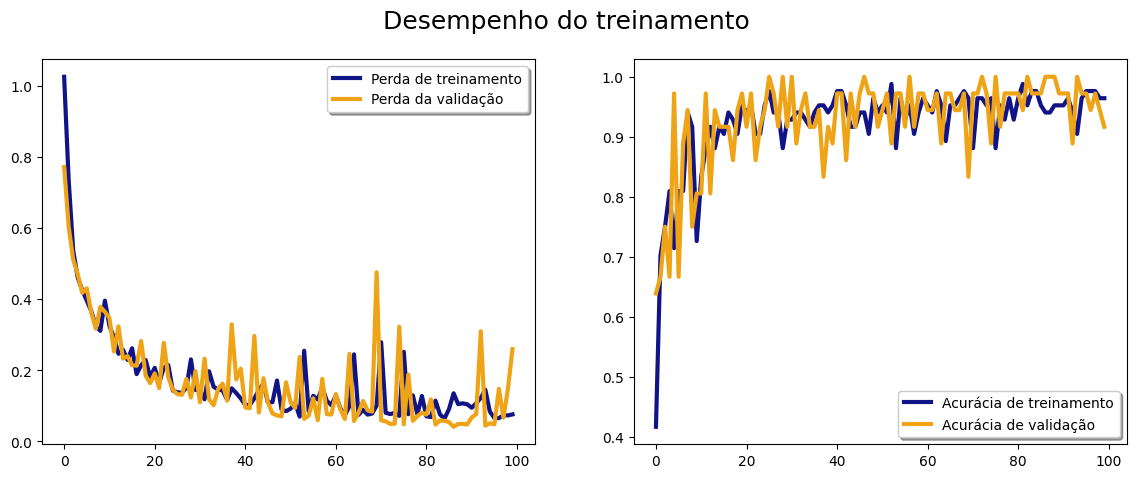

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.9000 - loss: 0.2250


[0.22503429651260376, 0.8999999761581421]

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Carregar o conjunto de dados Iris
iris = datasets.load_iris(return_X_y=True)
x = iris[0]
y = iris[1]

# Binarizando as categorias
y = tf.keras.utils.to_categorical(y)

# Normalizando os dados
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# Dividindo em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# Definindo o modelo
modelo = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[4,], name='entrada'),
    tf.keras.layers.Dense(256, activation='relu', name='oculta', kernel_initializer=tf.keras.initializers.RandomNormal(seed=42)),
    tf.keras.layers.Dense(3, activation='softmax', name='saida')
])

# Compilando o modelo com a nova taxa de aprendizado
modelo.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
               metrics=['categorical_accuracy'])

# Número de épocas
epocas = 100

# Treinando o modelo
historico = modelo.fit(
    x_treino, y_treino,
    epochs=epocas,
    validation_split=0.3
)

# Visualizando o histórico
import pandas as pd

pd.DataFrame(historico.history).plot()
plt.grid()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(historico.history['loss'], color='#111487', linewidth=3, label="Perda de treinamento")
ax[0].plot(historico.history['val_loss'], color='#EFA316', linewidth=3, label="Perda da validação")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(historico.history['categorical_accuracy'], color='#111487', linewidth=3, label="Acurácia de treinamento")
ax[1].plot(historico.history['val_categorical_accuracy'], color='#EFA316', linewidth=3, label="Acurácia de validação")
legend = ax[1].legend(loc='best', shadow=True)

plt.suptitle('Desempenho do treinamento', fontsize=18)
plt.show()

# Avaliando o modelo
modelo.evaluate(x_teste, y_teste)
